**PROCESSING**

In [38]:
import pandas as pd
import numpy as np

# Returns: input DF without outliers
def removeOutliersIQR(df, col):
    colValList = list(df[col])
    q1 = np.quantile(colValList, 0.25)
    q3 = np.quantile(colValList, 0.75)
    iqr = q3 - q1
    prod = iqr * 1.5
    outlierList = []
    for item in colValList:
        # if (item > Q3 + IQR * 1.5) or (item < Q1 - IQR * 1.5)
        if (item > (q3 + prod)) or (item < (q1 - prod)):
            # print item
            outlierList.append(item)
            df = df.drop(df[df[col] == item].index)
    return df

# CLEANING MANU DF
def manu_process(ManuDF):
    ManuDF = ManuDF.drop('Condo_Project', axis=1) # drop Condo_Project (100% missing)
    ManuDF = ManuDF.drop('Room_Count', axis=1) # drop Room_Num (100% missing)
    ManuDF = ManuDF.drop('Bdrm_Count', axis=1) # drop Bdrm_Num (100% missing)
    ManuDF = ManuDF.drop('Ext_Wall', axis=1) # drop Ext_Wall (50% missing)
    ManuDF = ManuDF.drop('Story_Count', axis=1) # drop Story_Num (50% missing)
    ManuDF = ManuDF.drop('Year_Built', axis=1) # drop Year_Built (50% missing)
    ManuDF = ManuDF.drop('Finished_Sqft', axis=1) # drop Finished_Sqft (33.3% missing)
    return ManuDF

# CLEANING COMM DF
def comm_process(CommDF):
    CommDF = CommDF.drop('Condo_Project', axis=1) # drop Condo_Project (100% missing)
    CommDF.dropna(subset=['Year_Built'], inplace=True)

    CommDF['Room_Count'] = CommDF['Room_Count'].fillna(CommDF['Room_Count'].median())
    CommDF['Finished_Sqft'] = CommDF['Finished_Sqft'].fillna(CommDF['Finished_Sqft'].median())
    CommDF['Bdrm_Count'] = CommDF['Bdrm_Count'].fillna(CommDF['Bdrm_Count'].median())
    CommDF['Unit_Count'] = CommDF['Unit_Count'].fillna(CommDF['Unit_Count'].median())
    CommDF['Story_Count'] = CommDF['Story_Count'].fillna(CommDF['Story_Count'].median())
    CommDF['Lot_Size'] = CommDF['Lot_Size'].fillna(CommDF['Lot_Size'].median())
    CommDF['Ext_Wall'] = CommDF['Ext_Wall'].fillna(CommDF['Ext_Wall'].mode()[0])
 

    CommDF = removeOutliersIQR(CommDF,'Room_Count')
    CommDF = removeOutliersIQR(CommDF,'Finished_Sqft')
    CommDF = removeOutliersIQR(CommDF,'Bdrm_Count')
    CommDF = removeOutliersIQR(CommDF,'Unit_Count')
    CommDF = removeOutliersIQR(CommDF,'Lot_Size')
    
    return CommDF

# CLEANING RES DF
def res_process(ResDF):
    ResDF = ResDF.drop('Condo_Project', axis=1) # drop Condo_Project (100% missing)
    ResDF = ResDF.drop(ResDF.loc[ResDF['Lot_Size']==0].index) # TEMPORARY: drop instance swith 0 lotsize
    ResDF.dropna(subset=['Year_Built'], inplace=True)


    ResDF['Room_Count'] = ResDF['Room_Count'].fillna(ResDF['Room_Count'].median())
    ResDF['Finished_Sqft'] = ResDF['Finished_Sqft'].fillna(ResDF['Finished_Sqft'].median())
    ResDF['Bdrm_Count'] = ResDF['Bdrm_Count'].fillna(ResDF['Bdrm_Count'].median())
    ResDF['Lot_Size'] = ResDF['Lot_Size'].fillna(ResDF['Lot_Size'].median())
    ResDF['Story_Count'] = ResDF['Story_Count'].fillna(ResDF['Story_Count'].median())
    ResDF['Ext_Wall'] = ResDF['Ext_Wall'].fillna(ResDF['Ext_Wall'].mode()[0])
    ResDF['Style'] = ResDF['Style'].fillna(ResDF['Style'].mode()[0])

    ResDF = removeOutliersIQR(ResDF,'Room_Count')
    ResDF = removeOutliersIQR(ResDF,'Finished_Sqft')
    ResDF = removeOutliersIQR(ResDF,'Bdrm_Count')
    ResDF = removeOutliersIQR(ResDF,'Lot_Size')

    return ResDF

# CLEANING CONDO DF
def condo_process(CondoDF):
    CondoDF = CondoDF.drop('Ext_Wall', axis=1) # drop Ext_Wall (100% missing)
    CondoDF.dropna(subset=['Condo_Project'], inplace=True)

    CondoDF['Story_Count'] = CondoDF['Story_Count'].fillna(CondoDF['Story_Count'].median())
    CondoDF['Room_Count'] = CondoDF['Room_Count'].fillna(CondoDF['Room_Count'].median())
    CondoDF['Bdrm_Count'] = CondoDF['Bdrm_Count'].fillna(CondoDF['Bdrm_Count'].median())

    CondoDF = removeOutliersIQR(CondoDF,'Room_Count')
    CondoDF = removeOutliersIQR(CondoDF,'Finished_Sqft')
    CondoDF = removeOutliersIQR(CondoDF,'Bdrm_Count')
    CondoDF = removeOutliersIQR(CondoDF,'Unit_Count')

    return CondoDF

# CLEANING APT DF
def apt_process(AptDF):
    AptDF = AptDF.drop('Condo_Project', axis=1) # drop Condo_Project (100% missing)
    AptDF = AptDF.drop('Room_Count', axis=1) # drop Room_Count (100% missing)
    AptDF = AptDF.drop('Bdrm_Count', axis=1) # drop Bdrm_Count (100% missing)

    AptDF['Ext_Wall'] = AptDF['Ext_Wall'].fillna(AptDF['Ext_Wall'].mode()[0])

    #AptDF = removeOutliersIQR(AptDF,'Room_Count')
    #AptDF = removeOutliersIQR(AptDF,'Bdrm_Count')
    AptDF = removeOutliersIQR(AptDF,'Finished_Sqft')
    AptDF = removeOutliersIQR(AptDF,'Unit_Count')

    return AptDF


**VISUALIZING**

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# create SPLOM using matplotlib
def vis_plt_SPLOM(df, xcol, ycol, path):
    xval = list(df[xcol])
    yval = list(df[ycol])

    plt.scatter(xval, yval)
    plt.savefig(path)
    plt.close()
    
def vis_plt_AVG_SCATTER(df, xcol, path):
    groupedDF = df.groupby([xcol]).mean()
    groupedSaleDF = pd.DataFrame(groupedDF['Sale_Price'])
    
    #Resetting the index to make 'District_Num' a column again
    groupedSaleDF.reset_index(inplace=True)

    
    x = np.array(groupedSaleDF[xcol])
    y = np.array(groupedSaleDF['Sale_Price'])
    
    plt.scatter(x, y)
    plt.savefig(path)
    plt.close()
    
# create SPLOM using seaborn
def vis_sns_SPLOM(df, path):
    sns_splom = sns.pairplot(df)
    sns_splom.savefig(path)
    plt.close()

# create HISTOGRAM using seaborn
def vis_HIST(df, col, path):
    sns.histplot(df[col], kde=True, color="m")
    plt.savefig(path)
    plt.clf()

# create LINEPLOT using seaborn
def vis_LINEPLOT(df, xval, yval, path):
    sns.lineplot(x = xval, y = yval, data = df)
    plt.savefig(path)
    plt.clf()

# create BOXPLOT
def vis_BOXPLOT(x):
    pass


**MAIN**

In [58]:
import pandas as pd
from processing import *
from visualizing import * 

# Returns: DFs of each subset of Property Type
def split_data(mainDF): 
    ManuDF = mainDF[mainDF['Prop_Type'] == 'Manufacturing'] # Manufacturing
    CommDF = mainDF[mainDF['Prop_Type'] == 'Commercial'] # Commercial
    ResDF = mainDF[mainDF['Prop_Type'] == 'Residential'] # Residential
    CondoDF = mainDF[mainDF['Prop_Type'] == 'Condominium'] # CondoDF
    AptDF = mainDF[mainDF['Prop_Type'] == 'Lg Apartment'] # Lg Apt DF
    return (ManuDF, CommDF, ResDF, CondoDF, AptDF)

# Returns: percentage of missing values in each column
def missingValAmt(df):
    missingDF = df.isna() # turn main DF into T/F for Missing/Not Missing
    missingNum = missingDF.sum() # sums each column in the missing DF
    missingNumPerc = (missingNum / len(df)) * 100 # prints percentage of missing values in each column
    return(missingNumPerc, missingNum)

# Returns: a DF of statistics for each column
def showStatistics(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
        statDF = df.describe(include='all').T
        statDF = df.to_string()
    return(statDF)

# Prints: all the subset DFs
def printSplitDFs(ManuDF, CommDF, ResDF, CondoDF, AptDF):
    print(" ")
    print("#---Manufacturing---#")
    print(ManuDF)
    print(" ")

    print("#---Commerical---#")
    print(CommDF)
    print(" ")

    print("#---Residential---#")
    print(ResDF)
    print(" ")

    print("#---Condominium---#")
    print(CondoDF)
    print(" ")

    print("#---Apartment---#")
    print(AptDF)
    print(" ")

# Returns: list of outliers
def showOutliersIQR(df,col):
    colValList = sorted(list(df[col]))
    q1 = np.quantile(colValList, 0.25)
    q3 = np.quantile(colValList, 0.75)
    iqr = q3 - q1
    prod = iqr * 1.5
    outlierList = []
    for item in colValList:
        # if (item > Q3 + IQR * 1.5) or (item < Q1 - IQR * 1.5)
        if (item > (q3 + prod)):
            outlierList.append(item)
        elif (item < (q1 - prod)):
            outlierList.append(item)
    
    return sorted(outlierList)

def corrMatrix(ManuDF, CommDF, ResDF, CondoDF, AptDF):
    corrManu = ManuDF[ManuDF.columns[1:]].corr()['Sale_Price'][:-1]
    corrComm = CommDF[CommDF.columns[1:]].corr()['Sale_Price'][:-1]
    corrRes = ResDF[ResDF.columns[1:]].corr()['Sale_Price'][:-1]
    corrCondo = CondoDF[CondoDF.columns[1:]].corr()['Sale_Price'][:-1]
    corrApt = AptDF[AptDF.columns[1:]].corr()['Sale_Price'][:-1]
    corrDF = pd.DataFrame({'Manu' : pd.Series(corrManu), 'Comm' : pd.Series(corrComm), 'Res' : pd.Series(corrRes), 'Condo' : pd.Series(corrCondo), 'Apt' : pd.Series(corrApt)})
    return corrDF

def main():
    print("     ")
    pd.set_option('display.max_columns', None)

    # ---- SET UP DATAFRAME ---- #
    file = pd.read_csv("DATA/2022-property-sales-data.csv")
    ogDF = pd.DataFrame(file)
    mainDF = pd.DataFrame(file)
    mainDF.rename(columns={'PropertyID': 'Property_ID', 'PropType': 'Prop_Type', 'taxkey': 'Tax_Key', 'Address': 'Address', 'CondoProject':'Condo_Project', 'District': 'District_Num', 'nbhd':'Nbhd_Num', 'Style':'Style', 'Extwall':'Ext_Wall', 'Stories':'Story_Count', 'Year_Built':'Year_Built', 'Rooms': 'Room_Count', 'FinishedSqft' : 'Finished_Sqft', 'Units' : 'Unit_Count', 'Bdrms' : 'Bdrm_Count', 'Fbath' : 'Fbath_Count', 'Hbath' : 'Hbath_Count', 'Lotsize' : 'Lot_Size', 'Sale_date' : 'Sale_Date', 'Sale_price' : 'Sale_Price'}, inplace=True)
    
    # ---- CLEAN MAIN DF ---- #

    mainDF.drop(['Address'], axis=1, inplace=True)
    mainDF = mainDF.drop(mainDF.loc[mainDF['Year_Built']==0].index) # 
    mainDF = mainDF.drop(mainDF.loc[mainDF['Prop_Type']=='Exempt'].index)
   
    # ---- SPLIT DATAFRAMES ---- #
    ManuDF, CommDF, ResDF, CondoDF, AptDF = split_data(mainDF)
    #printSplitDFs(ManuDF, CommDF, ResDF, CondoDF, AptDF, ExemptDF)
    
    # ---- VISUALIZE BEFORE CLEANING ---- #
    #vis_sns_SPLOM(mainDF, 'VIS/MAIN/main_splom_raw.png') # MainDF Correlations - SPLOM 
    #vis_sns_SPLOM(mainDF, 'VIS/MAIN/main_splom_raw.png') # MainDF Correlations - SPLOM 
    #vis_HIST(mainDF, 'Sale_Price', 'VIS/MAIN/main_sale_dist_raw.png') # MainDF SalePrice Distribution - HISTOGRAM
    #vis_LINEPLOT(mainDF, 'Year_Built', 'Sale_Price', 'VIS/MAIN/main_year_vs_price_line_raw.png') # MainDF YearBuilt vs SalePrice - LINEPLOT

    # -- MANU
    #vis_sns_SPLOM(ManuDF, 'VIS/MANU/manu_splom_raw.png') # ManuDF Correlations - SPLOM

    # -- COMM
    #vis_sns_SPLOM(CommDF, 'VIS/COMM/comm_splom_raw.png') # CommDF Correlations - SPLOM

    # -- RES
    #vis_sns_SPLOM(ResDF, 'VIS/RES/res_splom_raw.png') # ResDF Correlations - SPLOM
    #vis_LINEPLOT(ResDF, 'Finished_Sqft', 'Sale_Price', 'VIS/RES/res_sqft_vs_price_line_raw.png') # ResDF FinishedSqft vs SalePrice - LINEPLOT
    #vis_HIST(ResDF, 'Room_Count', 'VIS/RES/res_room_dist_raw.png')  #ResDF Room Distribution - HISTOGRAM
    #vis_HIST(ResDF, 'Sale_Price', 'VIS/RES/res_price_dist_raw.png')  #ResDF Room Distribution - HISTOGRAM

    # -- CONDO
    #vis_sns_SPLOM(CondoDF, 'VIS/CONDO/condo_splom_fixed.png') # CondoDF Correlations - SPLOM

    # -- APT
    #vis_sns_SPLOM(AptDF, 'VIS/APT/apt_splom_fixed.png') # AptDF Correlations - SPLOM

    # ---- CLEAN SUBSET DFs ---- #
    ManuDF = manu_process(ManuDF)
    CommDF = comm_process(CommDF)
    ResDF = res_process(ResDF)
    CondoDF = condo_process(CondoDF)
    AptDF = apt_process(AptDF)

    # ---- STATISTICS FOR SUBSET DFs ---- #
    
    #print(showStatistics(mainDF))
    #print(corrMatrix(ManuDF, CommDF, ResDF, CondoDF, AptDF))
    #print(showOutliersIQR(ResDF,'Sale_Price'))

    # ---- VISUALIZE ---- #

    # Create Scatterplot of Average Sale Price for Each Categorical Descrptive Feature Label
    subDF_Names = {'Manu': ManuDF, 'Comm': CommDF, 'Res': ResDF, 'Condo': CondoDF, 'Apt': AptDF}

    for name, df in subDF_Names.items():
        df_name = name  # Use the specified name from the dictionary
    
        # List of specific column names
        column_names = ['District_Num', 'Nbhd_Num', 'Story_Count', 'Room_Count', 'Unit_Count', 'Bdrm_Count', 'Fbath_Count', 'Hbath_Count']
        
        for col_name in column_names:
            if col_name in df.columns:
                vis_plt_AVG_SCATTER(df, col_name, f'VIS/{df_name.upper()}/{df_name.lower()}_{col_name.lower()}_avg.png')
    
    #vis_sns_SPLOM(mainDF, 'VIS/MAIN/main_splom_fixed.png') # MainDF Correlations - SPLOM 
    #vis_sns_SPLOM(mainDF, 'VIS/MAIN/main_splom_fixed.png') # MainDF Correlations - SPLOM 
    #vis_HIST(mainDF, 'Sale_Price', 'VIS/MAIN/main_sale_dist_fixed.png') # MainDF SalePrice Distribution - HISTOGRAM
    #vis_LINEPLOT(mainDF, 'Year_Built', 'Sale_Price', 'VIS/MAIN/main_year_vs_price_line_fixed.png') # MainDF YearBuilt vs SalePrice - LINEPLOT

    # -- MANU
    #vis_sns_SPLOM(ManuDF, 'VIS/MANU/manu_splom_fixed.png') # ManuDF Correlations - SPLOM

    # -- COMM
    #vis_sns_SPLOM(CommDF, 'VIS/COMM/comm_splom_fixed.png') # CommDF Correlations - SPLOM

    # -- RES
    #vis_sns_SPLOM(ResDF, 'VIS/RES/res_splom_fixed.png') # ResDF Correlations - SPLOM
    #vis_LINEPLOT(ResDF, 'Finished_Sqft', 'Sale_Price', 'VIS/RES/res_sqft_vs_price_line_fixed.png') # ResDF FinishedSqft vs SalePrice - LINEPLOT
    #vis_HIST(ResDF, 'Room_Count', 'VIS/RES/res_room_dist_fixed.png')  #ResDF Room Distribution - HISTOGRAM
    #vis_HIST(ResDF, 'Sale_Price', 'VIS/RES/res_price_dist_fixed.png')  #ResDF Room Distribution - HISTOGRAM

    # -- CONDO
    #vis_sns_SPLOM(CondoDF, 'VIS/CONDO/condo_splom_fixed.png') # CondoDF Correlations - SPLOM

    # -- APT
    #vis_sns_SPLOM(AptDF, 'VIS/APT/apt_splom_fixed.png') # AptDF Correlations - SPLOM

    # ---- TEST ---- #
    
    
    #print((mainDF['Nbhd_Num'].unique()))

    # ---- UPDATE CSV ---- #
    subDFs = [ManuDF, CommDF, ResDF, CondoDF, AptDF] 
    mainDF = pd.concat(subDFs) # combine
    
    try:
        mainDF.to_csv('DATA/CLEANED_2022_Property_Sales.csv', index = False)
    except Exception as e:
        print(" ")
        print(f'There was an error updating the CSV file: {e}')
    else:
        print(" ")
        print("Successfully updated CSV file!")

main()

/var/folders/y5/gm5w6cr53lq9bx_hyjyfb7nr0000gn/T/ipykernel_23207/1647254836.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedDF = df.groupby([xcol]).mean()
/var/folders/y5/gm5w6cr53lq9bx_hyjyfb7nr0000gn/T/ipykernel_23207/1647254836.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedDF = df.groupby([xcol]).mean()
/var/folders/y5/gm5w6cr53lq9bx_hyjyfb7nr0000gn/T/ipykernel_23207/1647254836.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns 

 
Successfully updated CSV file!


**ALGORITHMS**

# ***Model 1: Random Forest Regression***

Mean Squared Error: 342383.14034863294
----
TRAINING Root Mean Squared Error: 803.4484328221774
TESTING Root Mean Squared Error: 585.135147080256
----
TESTING Root Mean Squared Percent Error: 0.39151725736814924
TRAINING Root Mean Squared Percent Error: 0.25150126572376214
----
TESTING Mean Absolute Squared Error: 99.32056640625012
----
R-squared: 0.9999487043608284


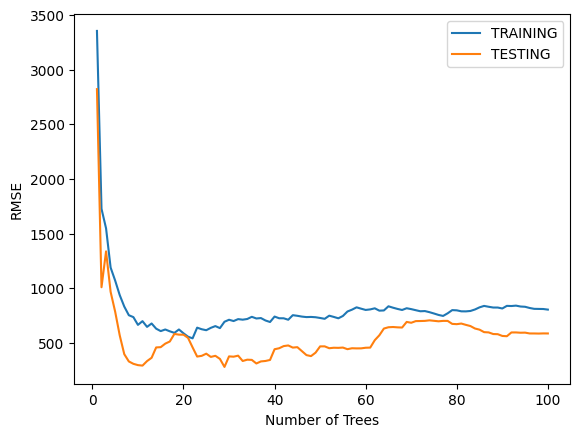

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up mainDF
file = pd.read_csv("DATA/CLEANED_2022_Property_Sales.csv")
mainDF = pd.DataFrame(file)
mainDF.rename(columns={'PropertyID': 'Property_ID', 'PropType': 'Prop_Type', 'taxkey': 'Tax_Key', 'Address': 'Address', 'CondoProject':'Condo_Project', 'District': 'District_Num', 'nbhd':'Nbhd_Num', 'Style':'Style', 'Extwall':'Ext_Wall', 'Stories':'Story_Count', 'Year_Built':'Year_Built', 'Rooms': 'Room_Count', 'FinishedSqft' : 'Finished_Sqft', 'Units' : 'Unit_Count', 'Bdrms' : 'Bdrm_Count', 'Fbath' : 'Fbath_Count', 'Hbath' : 'Hbath_Count', 'Lotsize' : 'Lot_Size', 'Sale_date' : 'Sale_Date', 'Sale_price' : 'Sale_Price'}, inplace=True)

# Set up property type subset DFs
ResDF = mainDF[mainDF['Prop_Type'] == 'Residential'] 
ResDF = ResDF.dropna(how='all', axis=1) # Drop NaN rows as they are rows that were dropped during preprocessing
ResDF = ResDF.drop(['Prop_Type'], axis = 1) # Drop Prop_Type, not necessary

# Factorize feature values in Training + Testing DFs
ResDF = ResDF.assign(Property_ID = pd.factorize(ResDF['Property_ID'])[0])
ResDF = ResDF.assign(Style = pd.factorize(ResDF['Style'])[0])
ResDF = ResDF.assign(Ext_Wall = pd.factorize(ResDF['Ext_Wall'])[0])
ResDF = ResDF.assign(Sale_Date = pd.DatetimeIndex(ResDF['Sale_Date']).month)

# Randomly assign instances to be a part of Training and Testing data
X_train, X_test, Y_train, Y_test = train_test_split(ResDF, ResDF['Sale_Price'], test_size=0.1, random_state=44)

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
#X_train = pd.DataFrame(scaler.fit_transform(X_train))
#Y_train = np.array(scaler.fit_transform(np.array(Y_train).reshape(-1,1)))

#X_test = pd.DataFrame(scaler.fit_transform(X_test))
#Y_test = np.array(scaler.fit_transform(np.array(Y_test).reshape(-1,1)))

# Creating Classifier with parameters n_jobs (# of parallel jobs) and random_state (controls shuffling of data)
regressor = RandomForestRegressor(n_jobs=5, n_estimators = 100, max_features = None, oob_score = True, random_state=0)

# Train the Classifier
regressor.fit(X_train, Y_train)
Y_train_pred = regressor.predict(X_train)

# Test the Classifier 
Y_pred = regressor.predict(X_test)

# Evaluate the Model
#oob = regressor.oob_score_
#print(f'OOB Score: {oob}')

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

print("----")

rmse = mean_squared_error(Y_train, Y_train_pred, squared = False)
print(f'TRAINING Root Mean Squared Error: {rmse}')

rmse = mean_squared_error(Y_test, Y_pred, squared = False)
print(f'TESTING Root Mean Squared Error: {rmse}')

print("----")

rmspe = (np.sqrt(np.mean(np.square((Y_test - Y_pred) / Y_test)))) * 100
print(f'TESTING Root Mean Squared Percent Error: {rmspe}')

rmspe = (np.sqrt(np.mean(np.square((Y_train - Y_train_pred) / Y_train)))) * 100
print(f'TRAINING Root Mean Squared Percent Error: {rmspe}')

print("----")

mse = mean_absolute_error(Y_test, Y_pred)
print(f'TESTING Mean Absolute Squared Error: {mse}')
print("----")

r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')


def graphCurve(X_train,Y_train, Y_train_pred, X_test, Y_test, Y_pred):
    x_val = []
    train_rmse_val = []
    test_rmse_val = []
    
    for n in range(100):
        n = n+1
        regressor = RandomForestRegressor(n_jobs=5, n_estimators = n, max_features = None, random_state=0)
    
        regressor.fit(X_train, Y_train.ravel())  #fit the model
 
        Y_train_pred = regressor.predict(X_train) 
        Y_pred = regressor.predict(X_test) 
        
        error = mean_squared_error(Y_train, Y_train_pred, squared = False)  #calculate rmse
        train_rmse_val.append(error) #store rmse values
        
        error = mean_squared_error(Y_test,Y_pred, squared = False)  #calculate rmse
        test_rmse_val.append(error) #store rmse values
       
        x_val.append(n)
        
        
    # Compare Training vs Testing Errors
    plt.plot(x_val, train_rmse_val, label = "TRAINING") 
    plt.plot(x_val, test_rmse_val, label = "TESTING")
    plt.xlabel("Number of Trees")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()


graphCurve(X_train,Y_train, Y_train_pred, X_test, Y_test, Y_pred)

# **Model 3: KNN Regression**

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set up mainDF
file = pd.read_csv("DATA/CLEANED_2022_Property_Sales.csv")
mainDF = pd.DataFrame(file)
mainDF.rename(columns={'PropertyID': 'Property_ID', 'PropType': 'Prop_Type', 'taxkey': 'Tax_Key', 'Address': 'Address', 'CondoProject':'Condo_Project', 'District': 'District_Num', 'nbhd':'Nbhd_Num', 'Style':'Style', 'Extwall':'Ext_Wall', 'Stories':'Story_Count', 'Year_Built':'Year_Built', 'Rooms': 'Room_Count', 'FinishedSqft' : 'Finished_Sqft', 'Units' : 'Unit_Count', 'Bdrms' : 'Bdrm_Count', 'Fbath' : 'Fbath_Count', 'Hbath' : 'Hbath_Count', 'Lotsize' : 'Lot_Size', 'Sale_date' : 'Sale_Date', 'Sale_price' : 'Sale_Price'}, inplace=True)

# Set up property type subset DFs
ResDF = mainDF[mainDF['Prop_Type'] == 'Residential'] 
ResDF = ResDF.dropna(how='all', axis=1) # Drop NaN rows as they are rows that were dropped during preprocessing
ResDF = ResDF.drop(['Prop_Type'], axis = 1) # Drop Prop_Type, not necessary

# Factorize feature values in Training + Testing DFs
ResDF = ResDF.assign(Property_ID = pd.factorize(ResDF['Property_ID'])[0])
ResDF = ResDF.assign(Style = pd.factorize(ResDF['Style'])[0])
ResDF = ResDF.assign(Ext_Wall = pd.factorize(ResDF['Ext_Wall'])[0])
ResDF = ResDF.assign(Sale_Date = pd.DatetimeIndex(ResDF['Sale_Date']).month)

# Randomly assign instances to be a part of Training and Testing data
X_train, X_test, Y_train, Y_test = train_test_split(ResDF, ResDF['Sale_Price'], test_size=0.1, random_state=44)

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

# GridSearchCV for K
k_range = list(range(1,len(X_test)))
params = {'n_neighbors': k_range}

knn = neighbors.KNeighborsRegressor()
grid = GridSearchCV(knn, params, cv=10)
grid.fit(X_train, Y_train)
print(model.best_params_)

# predict
knn = neighbors.KNeighborsRegressor(n_neighbors=2, n_jobs = -1)
knn.fit(X_train_scaled, Y_train)  # fit the model

Y_train_pred = knn.predict(X_train_scaled)
Y_pred = knn.predict(X_test_scaled)


# Evaluate the Model
print(" ")

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

print("----")

rmse = mean_squared_error(Y_train, Y_train_pred, squared = False)
print(f'TRAINING Root Mean Squared Error: {rmse}')

rmse = mean_squared_error(Y_test, Y_pred, squared = False)
print(f'TESTING Root Mean Squared Error: {rmse}')

print("----")

rmspe = (np.sqrt(np.mean(np.square((Y_test - Y_pred) / Y_test)))) * 100
print(f'TESTING Root Mean Squared Percent Error: {rmspe}')

rmspe = (np.sqrt(np.mean(np.square((Y_train - Y_train_pred) / Y_train)))) * 100
print(f'TRAINING Root Mean Squared Percent Error: {rmspe}')

print("----")

mse = mean_absolute_error(Y_test, Y_pred)
print(f'TESTING Mean Absolute Squared Error: {mse}')
print("----")

r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')


